In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
auto_sales_data=pd.read_excel('Sales_Data.xlsx')#,dtype={'ORDERDATE':str})

In [25]:
auto_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [26]:
auto_sales_data.shape

(2747, 20)

In [27]:
auto_sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [41]:
from datetime import datetime, timedelta

In [45]:
order_date=datetime.strptime('2018-02-24', '%Y-%m-%d')
report_date=order_date+timedelta(days=828)
report_date_string=report_date.strftime('%Y-%m-%d')

In [46]:
report_date_string

'2020-06-01'

In [60]:
auto_sales_data['ORDERDATE'].min()

Timestamp('2018-01-06 00:00:00')

In [ ]:
#Since the MSRP and PRICEEACH are assumed to be determining if the sale s profitable or not, another column 'Inflated_price' is created as MSRP-PRICEEACH
auto_sales_data['Inflated_price']=auto_sales_data['MSRP']-auto_sales_data['PRICEEACH']

In [88]:
auto_sales_data.describe().T

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802
Inflated_price,2747.0,-0.407288,-219.87,-10.67,-0.36,10.33,154.64,27.408183


In [62]:
#unique_counts=auto_sales_data.groupby('CUSTOMERNAME')['PHONE'].nunique()
unique_counts= auto_sales_data.groupby('CUSTOMERNAME').agg({
    'PHONE':pd.Series.nunique,
    'ADDRESSLINE1':pd.Series.nunique,
    'CITY':pd.Series.nunique,
    'POSTALCODE':pd.Series.nunique,
    'COUNTRY':pd.Series.nunique,
    'CONTACTLASTNAME':pd.Series.nunique,
    'CONTACTFIRSTNAME':pd.Series.nunique,
    'STATUS':pd.Series.nunique
})

In [63]:
unique_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, AV Stores, Co. to giftsbymail.co.uk
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PHONE             89 non-null     int64
 1   ADDRESSLINE1      89 non-null     int64
 2   CITY              89 non-null     int64
 3   POSTALCODE        89 non-null     int64
 4   COUNTRY           89 non-null     int64
 5   CONTACTLASTNAME   89 non-null     int64
 6   CONTACTFIRSTNAME  89 non-null     int64
 7   STATUS            89 non-null     int64
dtypes: int64(8)
memory usage: 6.3+ KB


In [64]:
#The below shows that the data provided for customers do not have any anomaly and the customer details can be extracted by using only the customer name. 
#Also, later on, as part of RFM analysis, the status values will be analyzed further to check if any of the important customers are facing any difficulty.
unique_counts.value_counts()

PHONE  ADDRESSLINE1  CITY  POSTALCODE  COUNTRY  CONTACTLASTNAME  CONTACTFIRSTNAME  STATUS
1      1             1     1           1        1                1                 1         72
                                                                                   2         15
                                                                                   3          1
                                                                                   5          1
Name: count, dtype: int64

In [61]:
auto_sales_data['STATUS'].value_counts()

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [101]:
#create a function to create a subset of dataframe with columns of only int and float datatypes 
def numeric_df(dataframe):
    only_numeric_df=dataframe.select_dtypes(include=['float64','int64']).columns
    return dataframe[only_numeric_df]

In [102]:
numeric_df(auto_sales_data)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP,Inflated_price
0,10107,30,95.70,2,2871.00,828,95,-0.70
1,10121,34,81.35,5,2765.90,757,95,13.65
2,10134,41,94.74,2,3884.34,703,95,0.26
3,10145,45,83.26,6,3746.70,649,95,11.74
4,10168,36,96.66,1,3479.76,586,95,-1.66
...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2924,54,-58.22
2743,10373,29,137.19,1,3978.51,2865,54,-83.19
2744,10386,43,125.99,4,5417.57,2836,54,-71.99
2745,10397,34,62.24,1,2116.16,2810,54,-8.24


In [85]:
#defining a function to perform univariate analysis(box-plot)
def box_plot(dataframe):
    plt.figure(figsize=(25,20))
    clmn=dataframe.select_dtypes(include=['float64','int64']).columns
    for i in range(len(clmn)):
        plt.subplot(5,4,i+1)
        sns.boxplot(data=dataframe, y=dataframe[clmn[i]],hue=dataframe[clmn[i]])
        plt.title('Box-plot of {}'.format(clmn[i]))
        plt.tight_layout()

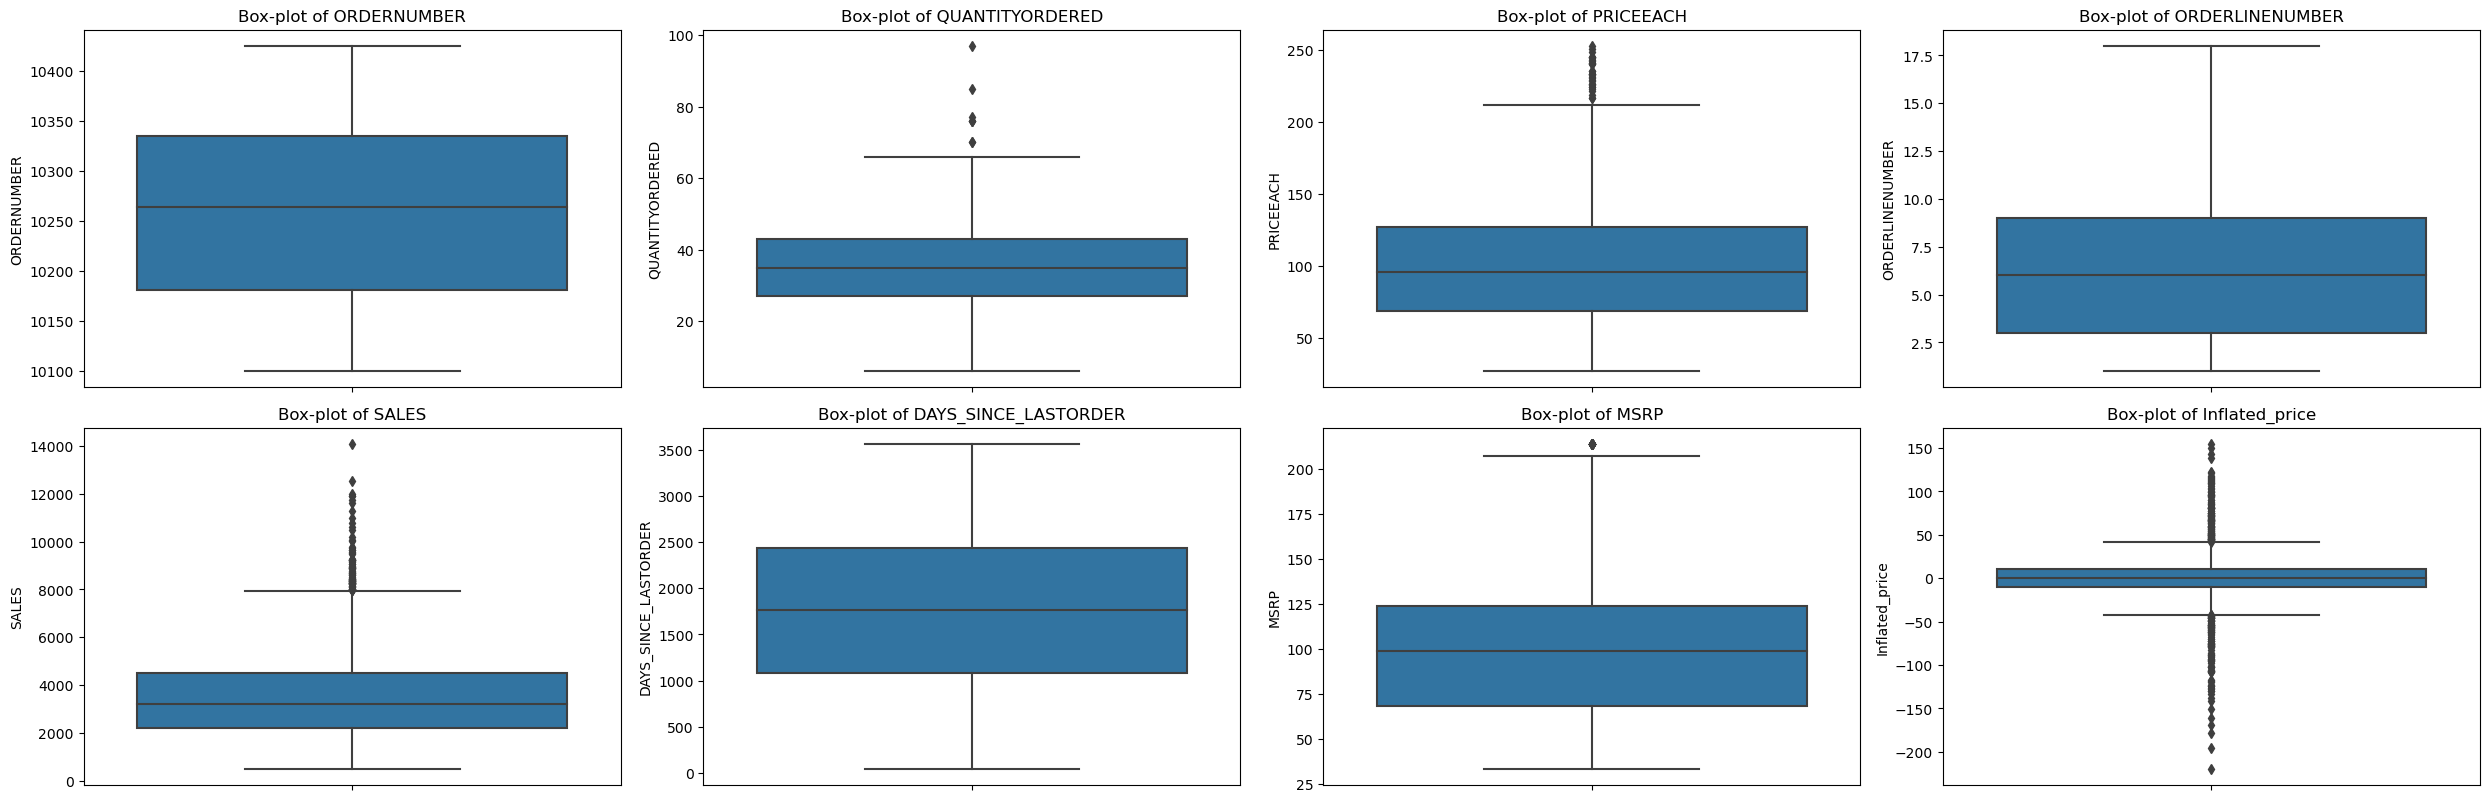

In [89]:
#auto_sales_data.select_dtypes(include=['float64','int64']).columns
box_plot(auto_sales_data)

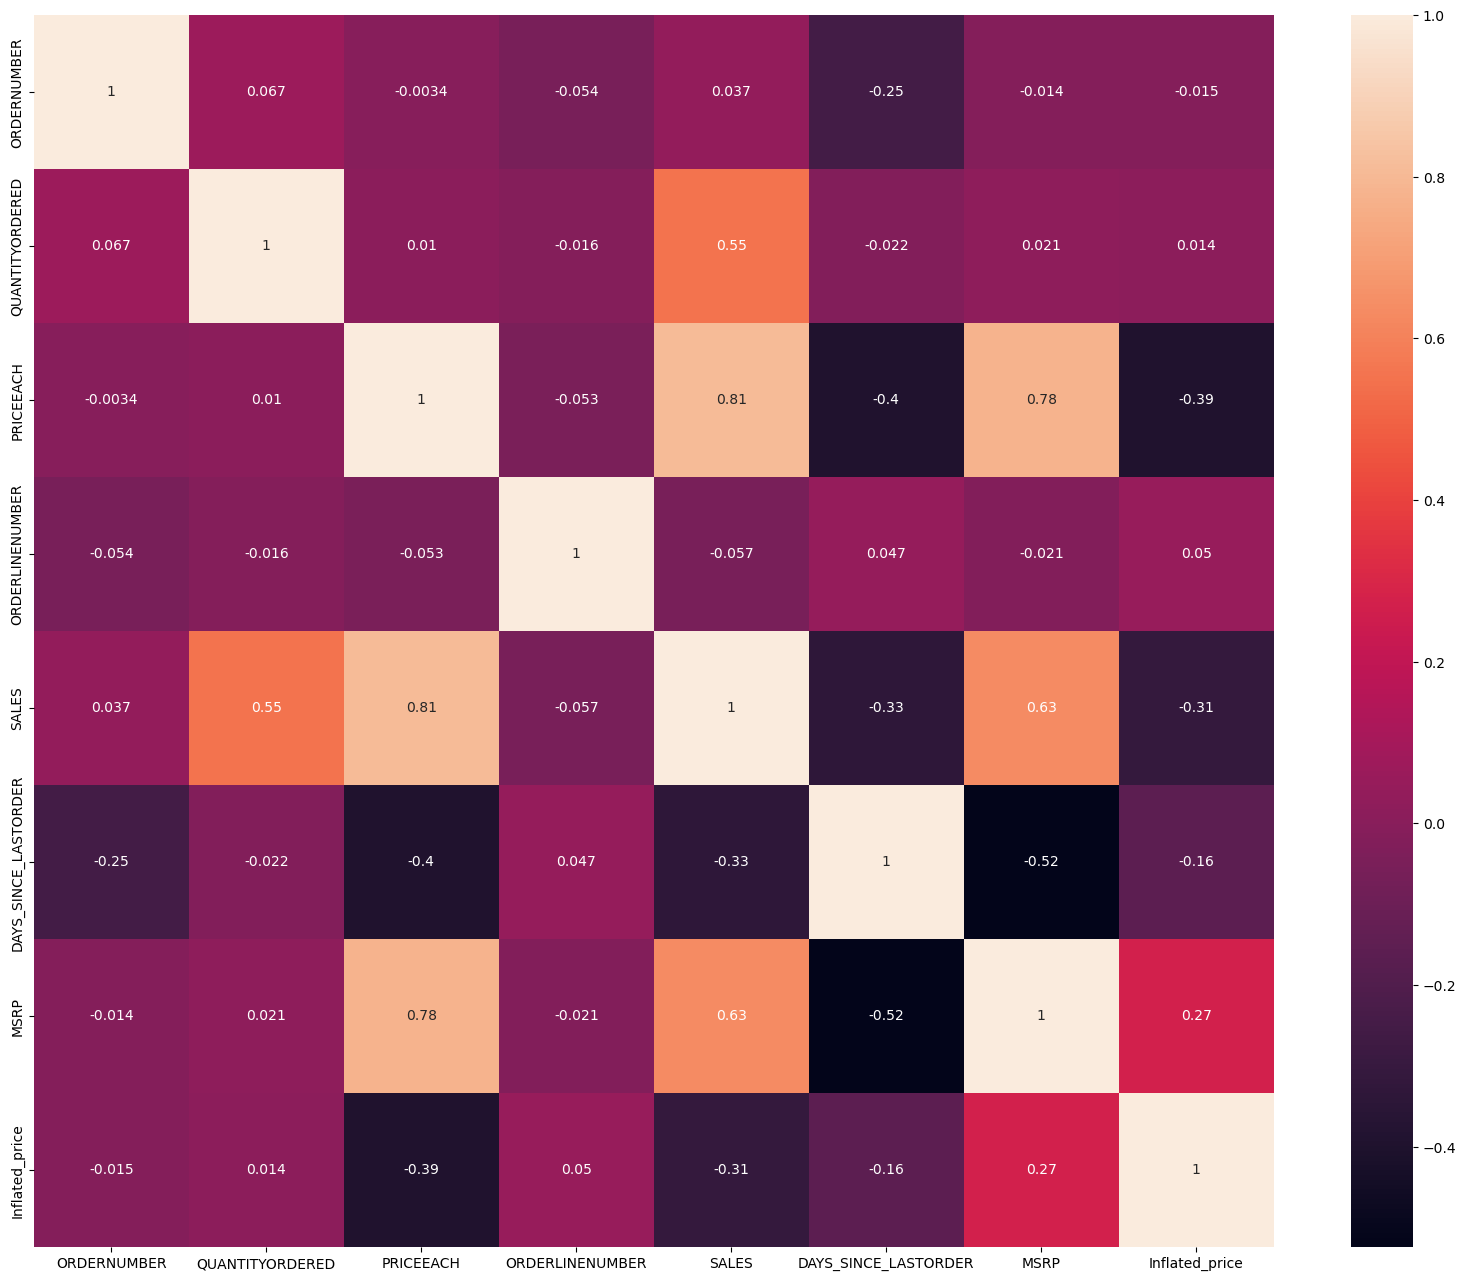

In [103]:
#correlation matrix
correlation_matrix=numeric_df(auto_sales_data).corr()
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True)
plt.show();

In [140]:
grocery_data=pd.read_csv('grocery_dataset_group.csv', parse_dates=True, index_col=0)

In [141]:
grocery_data.shape

(20641, 2)

In [142]:
grocery_data.head(100)

,Order_id,Product
Date,,
01-01-2018,1,yogurt
01-01-2018,1,pork
01-01-2018,1,sandwich bags
01-01-2018,1,lunch meat
01-01-2018,1,all- purpose
...,...,...
02-01-2018,6,toilet paper
02-01-2018,6,bagels
02-01-2018,6,dishwashing liquid/detergent


In [143]:
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20641 entries, 01-01-2018 to 26-02-2020
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_id  20641 non-null  int64 
 1   Product   20641 non-null  object
dtypes: int64(1), object(1)
memory usage: 483.8+ KB


In [144]:
#Counting the orderIDs for each date and storing it in the dataframe as additional column
grocery_data['Order_count']=grocery_data.groupby(grocery_data.index)['Order_id'].count()

In [153]:
timeseries_order_data=pd.read_excel('timeseries_grocery_excel.xlsx', parse_dates=True,  index_col=0)

C:\Users\av913372\AppData\Local\Temp\ipykernel_59460\1532421023.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  timeseries_order_data=pd.read_excel('timeseries_grocery_excel.xlsx', parse_dates=True,  index_col=0)


In [154]:
timeseries_order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 13-01-2018 to 2020-12-02 00:00:00
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Count of Order_id  603 non-null    int64
dtypes: int64(1)
memory usage: 9.4+ KB


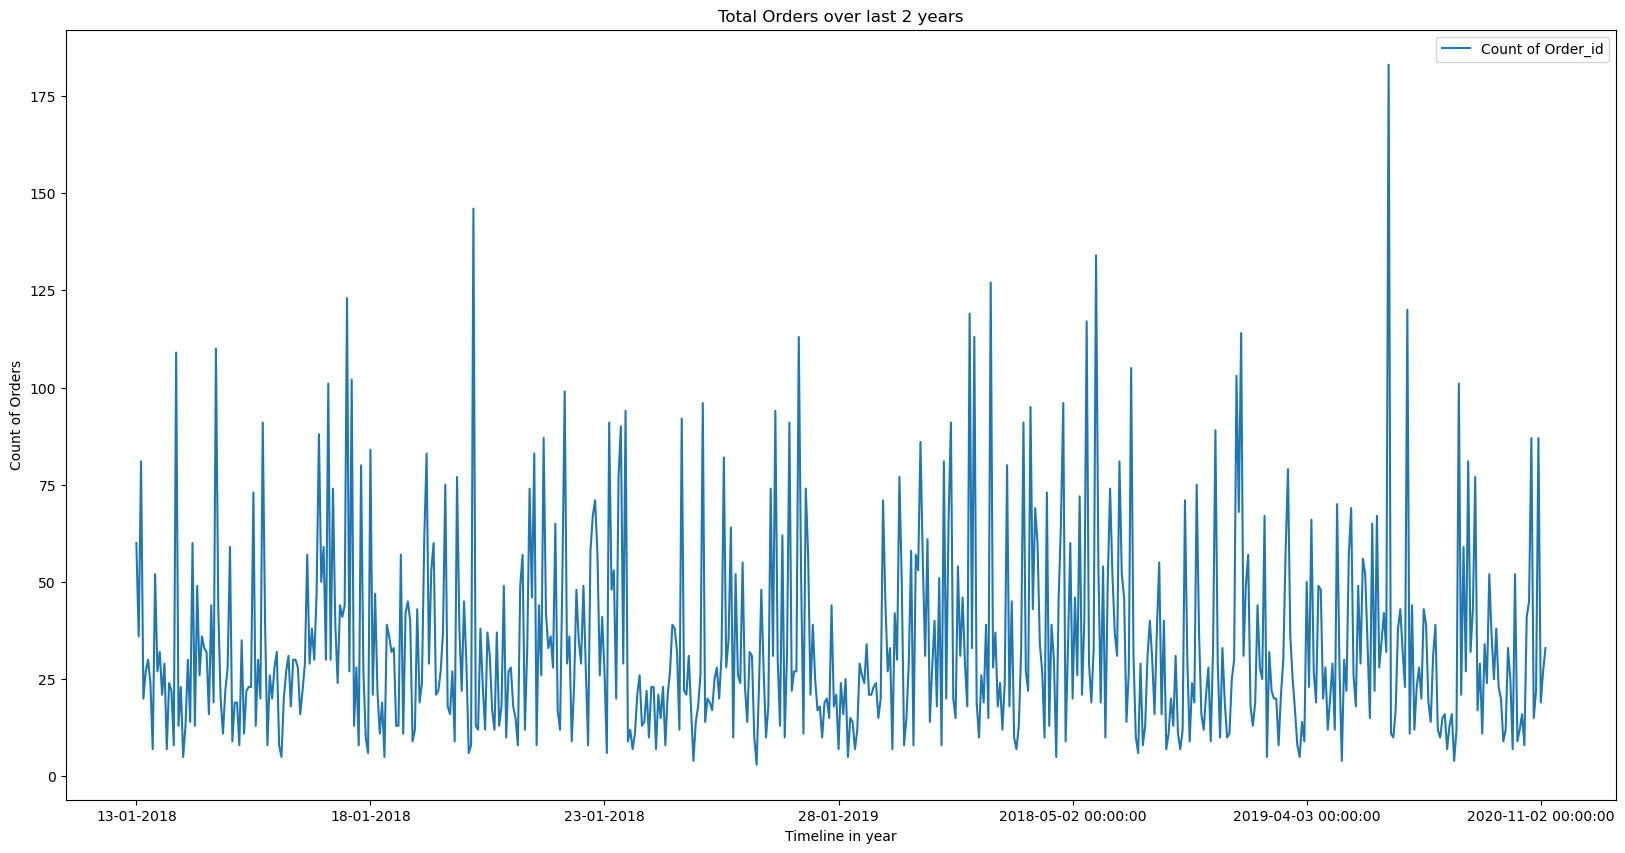

In [155]:
timeseries_order_data.plot(figsize=(20,10))
plt.xlabel('Timeline in year')
plt.ylabel('Count of Orders')
plt.title('Total Orders over last 2 years')
plt.show();

In [161]:
#Counting the orderIDs for each product and storing it in the dataframe as additional column
grocery_data['product_count']=grocery_data.groupby(grocery_data.Product)['Order_id'].count()

In [167]:
#grocery_data.drop('product_count', inplace=True, axis=1)
grocery_data.Product.value_counts()

Product
poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas           

In [169]:
grocery_data

,Order_id,Product,Order_count
Date,,,
01-01-2018,1,yogurt,39
01-01-2018,1,pork,39
01-01-2018,1,sandwich bags,39
01-01-2018,1,lunch meat,39
01-01-2018,1,all- purpose,39
...,...,...,...
25-02-2020,1138,soda,19
25-02-2020,1138,paper towels,19
26-02-2020,1139,soda,3
